<a href="https://colab.research.google.com/github/nehagoyal09/Python_Main_Topics/blob/main/Day_11_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Cleaning**
Extracting Nan Vlaues (not a number)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Reading our dataset

data = pd.read_csv('/content/diabetes raw data.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Total rows & columns

data.shape

(768, 9)

In [ ]:
# Basic Statistics

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Replacing 0 with Nan**

In [ ]:
# All Columns

columns = list(data)
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
# Checking Nan values

data.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Calculating total zeroes in Glucose, BP, ST, Insulin ,BMI

# (data == 0).sum()
(data[columns[1:6]] == 0).sum()

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [ ]:
# Replace Statement

data[columns[1:6]] = data[columns[1:6]].replace(0, np.nan)

In [ ]:
# Again checking nan values

data.isna().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**Drop Empty Rows**

In [ ]:
# Before Drop statement

data.shape

(768, 9)

In [ ]:
# Drop Statement

data.dropna(inplace = True)

In [ ]:
# After Drop statement     (Final result)

data.shape

(392, 9)

In [ ]:
print("Total rows:", 768-392, "Final Result: 47%")

Total rows: 376 Final Result: 47%


# **Dealing With Missing Values**
Imputation Techniques

Mean , Median , Mode


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data1 = pd.read_csv('/content/CompanyProfit.csv')
data2 = pd.read_csv('/content/CompanyProfit_new.csv')
data3 = pd.read_csv('/content/CompanyProfit_Success.csv')

## **Mean Technique**

In [ ]:
data1.head(10)

,Year,Profit ($)
0,1920,522.0
1,1921,1573.0
2,1922,200000.0
3,1923,1069.0
4,1924,1051.0
5,1925,872.0
6,1926,NaN
7,1927,450.0
8,1928,1710.0
9,1929,1537.0


In [ ]:
# Checking Empty Values

data1.isna().sum()

,0
Year,0
Profit ($),10


/tmp/ipython-input-3915455605.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Profit ($)'])


<Axes: xlabel='Profit ($)', ylabel='Density'>

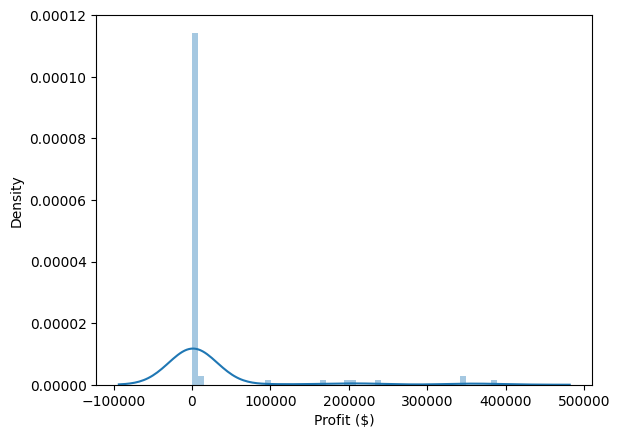

In [ ]:
# Distribution plot to identify which technique to use

sns.distplot(data1['Profit ($)'])

In [ ]:
# Fillna Method using mean

col = data1['Profit ($)']

col = col.fillna(col.mean(), inplace = True)

In [ ]:
# after Fillna method

data1.isna().sum()

,0
Year,0
Profit ($),0


In [ ]:
data1.head(10)

,Year,Profit ($)
0,1920,522.000000
1,1921,1573.000000
2,1922,200000.000000
3,1923,1069.000000
4,1924,1051.000000
5,1925,872.000000
6,1926,23117.626374
7,1927,450.000000
8,1928,1710.000000
9,1929,1537.000000


## **Median Technique**

In [ ]:
data2.isna().sum()

,0
Year,0
Profit ($),15


/tmp/ipython-input-1837044470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['Profit ($)'])


<Axes: xlabel='Profit ($)', ylabel='Density'>

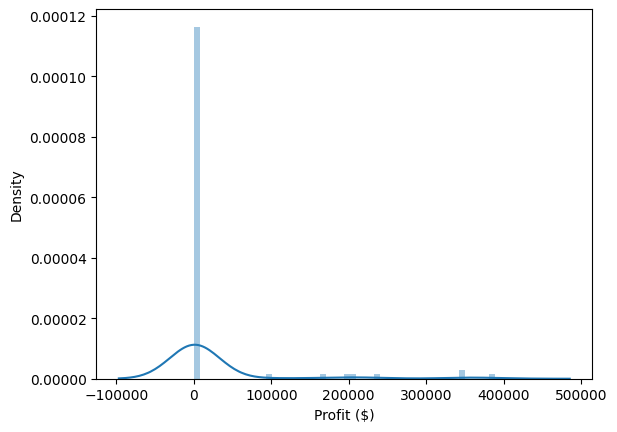

In [ ]:
sns.distplot(data2['Profit ($)'])

In [ ]:
# Fillna using method Median

col = data2['Profit ($)']

col = col.fillna(col.median(), inplace = True)

In [ ]:
# After fillna method

data2.isna().sum()

,0
Year,0
Profit ($),0


## **Conclusion**
 **Mean** - For Normal Distribution

 **Median** - Right or Left Skewed Data   (Not Normal Distribution)

 (not a use for alpha , only use for number)

###**Mode Technique**



In [ ]:
data3.head()

,Year,Profit ($),Success
0,1920,522.0,Yes
1,1921,1573.0,No
2,1922,200000.0,Yes
3,1923,1069.0,No
4,1924,1051.0,NaN


In [ ]:
data3.isna().sum()

,0
Year,0
Profit ($),15
Success,9


In [ ]:
col = data3['Profit ($)']

col = col.fillna(col.mode()[0], inplace = True)

In [ ]:
data3.isna().sum()

,0
Year,0
Profit ($),0
Success,9


In [ ]:
col = data3['Success']

col = col.fillna(col.mode()[0], inplace = True)

In [ ]:
data3.isna().sum()

,0
Year,0
Profit ($),0
Success,0
